# Programa para plotar a precipitação total observada obtida pelos pluviometros da ANA, CEMADEN, estacoes INMET e IAG

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [2]:
dados = pd.read_table('...', sep='\s+')
print (dados)

        Estacao     Lat     Lon     Ano   Mes   Dia  Chuva
0       2246170 -22.850 -46.242  2016.0  12.0  18.0    5.2
1       2247058 -22.959 -47.296  2016.0  12.0  18.0    0.0
2       2346095 -23.103 -46.558  2016.0  12.0  18.0    0.0
3       2347056 -23.090 -47.727  2016.0  12.0  18.0    0.0
4       2246033 -22.881 -46.632  2016.0  12.0  18.0    6.4
..          ...     ...     ...     ...   ...   ...    ...
433  355070415A -23.793 -45.403  2016.0  12.0  18.0    0.0
434  355070416A -23.793 -45.566  2016.0  12.0  18.0    0.0
435  355070418A -23.823 -45.415  2016.0  12.0  18.0    0.0
436  355070419A -23.767 -45.596  2016.0  12.0  18.0    1.0
437  355070420A -23.732 -45.403  2016.0  12.0  18.0    0.2

[438 rows x 7 columns]


## Plot da precipitacao acumulada acima de 5 mm

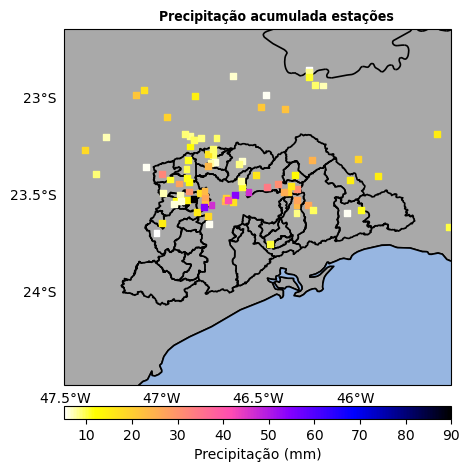

In [3]:
proj = cartopy.crs.PlateCarree(central_longitude=-46.5)
trans = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', subplot_kw=dict(projection=proj))
extent=[-47.5056, -45.5064, -24.4774, -22.6414]
ax.set_extent(extent, crs=trans)
grid_spc_lat=0.5
grid_spc=0.5
shapename_SP = '...'
resol = '10m'  # use data at this scale
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
ax.add_feature(land, linewidth=1.2 , facecolor='darkgrey', edgecolor='black')
ax.add_feature(ocean, linewidth=1.2, edgecolor='black')
stt_prv = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines',
    scale='10m',facecolor='white')
ax.add_feature(stt_prv, linewidth=1.2, facecolor='darkgrey', edgecolor='k', alpha=1)
ax.add_geometries(shpreader.Reader(shapename_SP).geometries(), trans,
        linewidth=1.2, facecolor='darkgrey', edgecolor='black', zorder=2)
gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                    ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cmap = plt.get_cmap('gnuplot2')
plot_dados = ax.scatter(
    x=dados.loc[dados['Chuva']>=5.0]["Lon"],
    y=dados.loc[dados['Chuva']>=5.0]["Lat"],
    c=dados.loc[dados['Chuva']>=5.0]["Chuva"], cmap=cmap.reversed(), 
    marker='s',
    vmin = 5, vmax= 90,
    s=18,
    zorder=2,
    alpha=1,
    transform=trans
)
fig.colorbar(plot_dados, spacing='uniform',label='Precipitação (mm)',
                 orientation='horizontal', shrink=1.0,
                 aspect=30, pad=0.045)
plt.title('Precipitação acumulada estações', weight='bold', stretch='condensed',
              size='medium', position=(0.55, 1))
plt.savefig(('PrecipAcumObs.png'), dpi=300, bbox_inches='tight')
plt.show()

In [4]:
import geopandas as gpd
import shapely.vectorized

### Plot da precipitação total apenas para a RMSP (aplicação de máscara no plot) 
#### Obs: Nao foi utilizado na tese

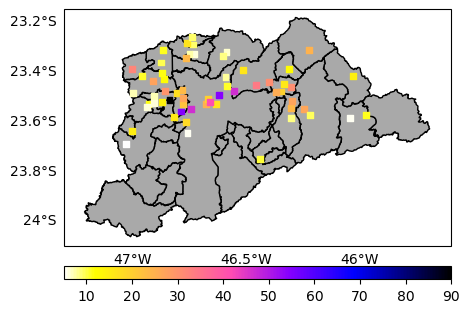

In [12]:
proj = cartopy.crs.PlateCarree(central_longitude=-46.5)
trans = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(figsize=(5, 6), facecolor='w', subplot_kw=dict(projection=proj))
extent=[-47.3, -45.6, -24.10, -23.15]
ax.set_extent(extent, crs=trans)
grid_spc_lat=0.2
grid_spc=0.5
gdf = gpd.read_file('...')
mask = shapely.vectorized.contains(gdf.dissolve().geometry.item(), dados.loc[dados['Chuva']>=5.0]["Lon"], 
                                   dados.loc[dados['Chuva']>=5.0]["Lat"])
gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                    ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
gl.top_labels = gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cmap = plt.get_cmap('gnuplot2')
plot_dados = ax.scatter(
    x=dados.loc[dados['Chuva']>=5.0]["Lon"],
    y=dados.loc[dados['Chuva']>=5.0]["Lat"], 
    c=np.where(mask, dados.loc[dados['Chuva']>=5.0]['Chuva'], np.nan), cmap=cmap.reversed(),
    marker='s',
    vmin = 5, vmax= 90,
    s=18,
    zorder=2,
    alpha=1,
    transform=trans
)
fig.colorbar(plot_dados, spacing='uniform',
                 orientation='horizontal', shrink=1.0,
                 aspect=30, pad=0.045)
gdf.plot(ax=ax, color='darkgrey', edgecolor='k', transform=trans)
plt.show()